In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Basic Import done")

Basic Import done


In [3]:
message=[line.rstrip() for line in open('datasets_spam.csv')]
print(len(message))

5575


In [4]:
for msg_no,message in enumerate(message[:10]):
    print(msg_no,message)
    print("\n")

0 v1,v2,,,


1 ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,


2 ham,Ok lar... Joking wif u oni...,,,


3 spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,


4 ham,U dun say so early hor... U c already then say...,,,


5 ham,"Nah I don't think he goes to usf, he lives around here though",,,


6 spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,


7 ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,


8 ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,


9 spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize r

In [5]:
#Lets read this file **VIMP
message=pd.read_csv('datasets_spam.csv',encoding = "ISO-8859-1",names=['Type','Message','U1','U2','U3'])
message.head(10)

,Type,Message,U1,U2,U3
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
5,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
6,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
7,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
8,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
9,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN


In [6]:
message=message.drop('U1',axis=1,)
message=message.drop('U2',axis=1,)
message=message.drop('U3',axis=1,)

In [7]:
message.head()

,Type,Message
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


# Exploratory Data Analysis

In [8]:
message.describe()

,Type,Message
count,5573,5573
unique,3,5170
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
message.groupby('Type').describe()

Message                                                               
       count unique                                                top freq
Type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4
v1         1      1                                                 v2    1

In [10]:
# Here we got that the feature spam messages have the most
# Lets get the length of each message
message['Length']=0 #Make a new column called 'Length'
message['Length']=message['Message'].apply(len)

In [11]:
message.head(10)

,Type,Message,Length
0,v1,v2,2
1,ham,"Go until jurong point, crazy.. Available only ...",111
2,ham,Ok lar... Joking wif u oni...,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,ham,U dun say so early hor... U c already then say...,49
5,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,spam,FreeMsg Hey there darling it's been 3 week's n...,148
7,ham,Even my brother is not like to speak with me. ...,77
8,ham,As per your request 'Melle Melle (Oru Minnamin...,160
9,spam,WINNER!! As a valued network customer you have...,158


In [12]:
#Drop the first row
message=message.drop(0,axis=0)
message

,Type,Message,Length
1,ham,"Go until jurong point, crazy.. Available only ...",111
2,ham,Ok lar... Joking wif u oni...,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,ham,U dun say so early hor... U c already then say...,49
5,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,161
5569,ham,Will Ì_ b going to esplanade fr home?,37
5570,ham,"Pity, * was in mood for that. So...any other s...",57
5571,ham,The guy did some bitching but I acted like i'd...,125


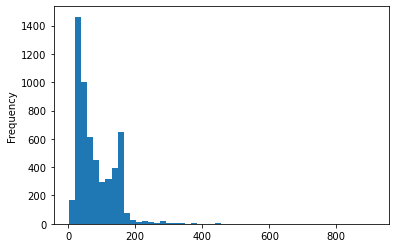

In [13]:
message['Length'].plot(bins=50,kind='hist')

In [14]:
message.Length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Length, dtype: float64

In [15]:
# To find a particular message by masking
message[message['Length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### The classification algorithm deals with numerical features. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In [16]:
#let's write a function that will split a message into its individual words and return a list
#Remove punctuations first
import string

mesg="This, is a message?..:with punctuation/."
nopunc=[i for i in mesg if i not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

This is a messagewith punctuation


In [17]:
# Lets get the mostly used words in english 
from nltk.corpus import stopwords
stopwords.words('english')[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [18]:
nopunc.split()

['This', 'is', 'a', 'messagewith', 'punctuation']

In [19]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['messagewith', 'punctuation']

In [20]:
# Lets combine it together and apply to dataframe messages
def spec_word(mess):
    nopunc=[i for i in mess if i not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
    

In [21]:
message.head(10)

,Type,Message,Length
1,ham,"Go until jurong point, crazy.. Available only ...",111
2,ham,Ok lar... Joking wif u oni...,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,ham,U dun say so early hor... U c already then say...,49
5,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,spam,FreeMsg Hey there darling it's been 3 week's n...,148
7,ham,Even my brother is not like to speak with me. ...,77
8,ham,As per your request 'Melle Melle (Oru Minnamin...,160
9,spam,WINNER!! As a valued network customer you have...,158
10,spam,Had your mobile 11 months or more? U R entitle...,154


# Tokenize the message

#### Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want) 

In [22]:
# Use the function
message['Message'].head(5).apply(spec_word)


1    [Go, jurong, point, crazy, Available, bugis, n...
2                       [Ok, lar, Joking, wif, u, oni]
3    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
4        [U, dun, say, early, hor, U, c, already, say]
5    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

# Vectorization

### To convert our list of words to an actual vector that SciKit-Learn can use.

#### We will be using bag-of-words:
1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [23]:
# Step-1: Use CountVectorizer,it converts collection of of text to metrics
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_transformer= CountVectorizer(analyzer=spec_word).fit(message['Message'])
print(len(bow_transformer.vocabulary_))

11304


In [25]:
message4=message['Message'][4] # Since we removed the first row
print(message4)

U dun say so early hor... U c already then say...


In [26]:
bow4 =bow_transformer.transform([message4])
print(bow4)
print((bow4).shape)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11304)


In [27]:
# There are 7 types of unique words
#The two words that are repeated twice
print(bow_transformer.get_feature_names()[3996])
print(bow_transformer.get_feature_names()[9445])

U
say


In [28]:
# Lets convert every message
message_bow=bow_transformer.transform(message['Message'])
print("The size of sparse matrix is :",message_bow.shape)
print("No.of non-zero occurence :",message_bow.nnz)

The size of sparse matrix is : (5572, 11304)
No.of non-zero occurence : 50193


In [29]:
sparsity=(100*message_bow.nnz)/(message_bow.shape[0]*message_bow.shape[1])
print("Sparsity :",sparsity)

Sparsity : 0.07968927896991783


## Step-2

#### After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [31]:
#Lets check the Inverse Document frequency for word 'Hello' and 'Love'
print("Hello :",tfidf_transformer.idf_[bow_transformer.vocabulary_['Hello']])
print("Love :",tfidf_transformer.idf_[bow_transformer.vocabulary_['Love']])
print("university",tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

Hello : 6.014770874925312
Love : 6.293484277394333
university 8.527076498901426


In [32]:
# Lets apply this transform to everybody
message_tfidf=tfidf_transformer.transform(message_bow)
print(message_tfidf.shape)

(5572, 11304)


# Train the document

In [33]:
from sklearn.naive_bayes import MultinomialNB
spam_model=MultinomialNB().fit(message_tfidf,message['Type'])

In [35]:
print("The message is :",message.Message[4])
print("The Predictions for 4th message :",spam_model.predict(tfidf4)[0])
print("Actual:",message.Type[4])

The message is : U dun say so early hor... U c already then say...
The Predictions for 4th message : ham
Actual: ham


# Model Evaluation

In [36]:
# Lets do it for all messages
spam_model_all_predictions=spam_model.predict(message_tfidf)
print("Predictions :\n",spam_model_all_predictions)

Predictions :
 ['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix :\n",confusion_matrix(message['Type'],spam_model_all_predictions))
print("Classification_report :\n",classification_report(message['Type'],spam_model_all_predictions))

Confusion Matrix :
 [[4825    0]
 [ 114  633]]
Classification_report :
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



#### Observations from confusion matrics
#### It gives values for TP ,FN,TN and FP in below manner
#### TP: True Positive  , FN :False Negetive
#### FP: False Positive, TN : True Negative


# Train-Test-Split

In [38]:
from sklearn.model_selection import train_test_split
X=message['Message']
y=message['Type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)


In [39]:
#Lets check the split
print("message_train :",X_train.shape)
print("Type_train :",y_train.shape)
print("message_test :",X_test.shape)
print("Type_test :",y_test.shape)

message_train : (3900,)
Type_train : (3900,)
message_test : (1672,)
Type_test : (1672,)


# Create a Data Pipeline

### Use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use 

In [40]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('CountVector',CountVectorizer(analyzer=spec_word)),('tfidf',TfidfTransformer()),('Classifier-NB',MultinomialNB()),])

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('CountVector',
                 CountVectorizer(analyzer=<function spec_word at 0x136A7C88>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier-NB', MultinomialNB())])

In [42]:
predictions = pipeline.predict(X_test)


In [44]:
#Get the accuracy of model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print("Accuracy score :",accuracy)

Accuracy score : 0.9599282296650717


In [47]:
#Pretty good acuracy score
# Lets get the classification report
print("Classificatio report :\n",classification_report(predictions,y_test))

Classificatio report :
               precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1523
        spam       0.69      1.00      0.82       149

    accuracy                           0.96      1672
   macro avg       0.84      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



In [48]:
# Use seaborn heat map for nice plot of confusion matrix
import seaborn as sns
def plot_conf_matrics(test,prediction):
    mtx = confusion_matrix(test, prediction)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=0.5,cmap="Blues", square=True, cbar=False)
    plt.ylabel('true Type')
    plt.xlabel('predicted Type')
    

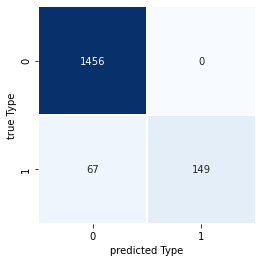

In [49]:
plot_conf_matrics(y_test,predictions)